# 외부 CB등급별 연체율 비교

데이터 분석 미션
* 과제1 : 연체금액산출
* 과제2 : 은행데이터 CB데이터 결합
* 과제3 : 등급별 연체율 계산 및 시각화
* 과제4 : 추가분석

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

#### # 데이터 불러오기

In [2]:
df_bank = pd.read_excel('data/raw_data.xlsx',sheet_name = 'bank_data')
df_bank.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0


In [3]:
df_cb = pd.read_excel('data/raw_data.xlsx',sheet_name = 'cb_data')
df_cb.head()

,acno,CB,SP,R,PI
0,37201901102569,8,6,3,5
1,37201901114919,1,8,4,2
2,37201901172631,10,9,9,1
3,37202001038750,2,8,2,5
4,37201901092321,7,5,8,3


In [4]:
len(df_bank), len(df_cb)

(18857, 18857)

In [5]:
len(df_bank['acno'].unique()), len(df_cb['acno'].unique())

(18857, 18857)

### 과제1. 연체금액 산출

In [6]:
df_bank['dlay_amt'] = ''
df_bank.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,dlay_amt
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,
3,37202001038750,F,19560524,66,20190709,5000000,0,0,
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,


In [7]:
df_bank['ovrd_dvcd'][1], df_bank['cur_bal'][1]

(0, 1911878)

In [8]:
df_bank['dlay_amt'] = [df_bank.cur_bal[i] if df_bank.ovrd_dvcd[i] == 1 else 0 
                       for i in range(len(df_bank))]

# ovrd_dvcd = 1 이면 cur_bal 값 사용, ovrd_dvcd=0 이면 0

In [9]:
df_bank.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,dlay_amt
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,0


### 과제2. 은행데이터 CB데이터 결합

In [10]:
df_mg = pd.merge(df_bank, df_cb, on = 'acno')
df_mg.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,dlay_amt,CB,SP,R,PI
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,0,8,6,3,5
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,0,1,8,4,2
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,0,10,9,9,1
3,37202001038750,F,19560524,66,20190709,5000000,0,0,0,2,8,2,5
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,0,7,5,8,3


In [13]:
len(df_mg)

18857

### 과제3 : 등급별/년도 분기별 연체율 계산 및 시각화

 * 연체율 : (연체금액 / 대출잔액) * 100

##### # 년도 분기별 컬럼 생성

In [13]:
#df_mg = df_mg.astype({'exec_dt':'str'})

In [14]:
#df_mg['exec_dt'].values[1][:4]

In [14]:
len(df_mg.exec_dt)

18857

In [11]:
def make_quarter(col_names):
    
    quarter = []
    
    for idx in range(len(col_names)):
        
        year = str(col_names[idx])[0:4]
        month = str(col_names[idx])[4:6]
        month = int(month) 

        if month <4:
            value = year + '.1Q'
            quarter.append(value)
        elif 4 <= month <7:
            value = year+ '.2Q'
            quarter.append(value)
        elif 7 <= month <10:
            value = year+ '.3Q'
            quarter.append(value)
        else:
            value = year+ '.4Q'
            quarter.append(value)
    
    return quarter

In [12]:
df_mg['exec_yq'] = make_quarter(df_mg.exec_dt)

In [13]:
df_mg.head(5)

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,dlay_amt,CB,SP,R,PI,exec_yq
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,0,8,6,3,5,2019.1Q
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,0,1,8,4,2,2021.4Q
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,0,10,9,9,1,2019.1Q
3,37202001038750,F,19560524,66,20190709,5000000,0,0,0,2,8,2,5,2019.3Q
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,0,7,5,8,3,2020.2Q


##### # 연체율 계산

In [161]:
#df_cb_dlay = df_mg.groupby(['exec_yq','CB']).agg({'dlay_amt': 'sum'})  

In [162]:
#df_cb_cur = df_mg.groupby(['exec_yq', 'CB']).agg({'cur_bal': 'sum'})

In [163]:
#df_cb = pd.concat(
#    [df_cb_dlay, df_cb_cur],
#    axis=1,
#)


#dlay_amt : dlay_amt 를 등급별로 전부 합한 것, 
#cur_bal : 등급별로 cur_bal 를 전부 합한 것

In [164]:
#df_cb['cb_dlay_rate'] = df_cb['dlay_amt']/ df_cb['cur_bal'] * 100

In [165]:
#df_cb = df_cb['cb_dlay_rate'].unstack()

In [14]:
def make_dlay_rate(df_mg , cb_dvcd ):  #cb_dvcd = CB, SP, R, PI 넣기
    
    re = []
    
    for idx in  df_mg.index:

        if df_mg[cb_dvcd][idx] <=2:
            re.append('1-2')
        elif df_mg[cb_dvcd][idx] <=4:
            re.append('3-4')
        elif df_mg[cb_dvcd][idx] <=6:
            re.append('5-6')
        elif df_mg[cb_dvcd][idx] <=8:
            re.append('7-8')
        else:
            re.append('9-10')
    
    df_mg['re_rating'] = re
    
    df_dlay = df_mg.groupby(['exec_yq', 're_rating']).agg({'dlay_amt': 'sum'})  
    df_cur  = df_mg.groupby(['exec_yq', 're_rating']).agg({'cur_bal': 'sum'})
    
    df = pd.concat([df_dlay, df_cur],axis=1)
    
    df['cb_dlay_rate'] = df['dlay_amt']/ df['cur_bal'] * 100
    df = df['cb_dlay_rate'].unstack()
    
    return df

In [15]:
df_cb = make_dlay_rate(df_mg, 'R')
df_cb.head(5)

re_rating,1-2,3-4,5-6,7-8,9-10
exec_yq,,,,,
2019.1Q,0.000000,3.008064,1.750636,4.616566,12.520980
2019.2Q,0.149828,2.620736,3.227408,7.684074,13.998793
2019.3Q,0.000000,2.065129,3.752618,10.175667,14.820081
2019.4Q,0.000000,4.442823,10.565735,6.938318,16.986671
2020.1Q,1.360942,2.867876,8.879818,10.868152,10.858211


In [54]:
# def make_dlay_rate(df_mg , cb_dvcd ):  #cb_dvcd = CB, SP, R, PI 넣기
#     df_dlay = df_mg.groupby(['exec_yq', cb_dvcd]).agg({'dlay_amt': 'sum'})  
#     df_cur  = df_mg.groupby(['exec_yq', cb_dvcd]).agg({'cur_bal': 'sum'})
    
#     df = pd.concat([df_dlay, df_cur],axis=1)
    
#     df['cb_dlay_rate'] = df['dlay_amt']/ df['cur_bal'] * 100
#     df = df['cb_dlay_rate'].unstack()
#     return df

In [57]:
# df_cb = make_dlay_rate(df_mg, 'R')
# df_cb.head(5)

R,1,2,3,4,5,6,7,8,9,10
exec_yq,,,,,,,,,,
2019.1Q,0.0,0.000000,2.314632,3.805594,0.000000,3.594307,5.788173,3.449819,10.576207,14.905566
2019.2Q,0.0,0.289060,4.436009,1.278331,2.367360,3.977490,6.172328,9.642593,12.363982,15.849680
2019.3Q,0.0,0.000000,2.187244,1.952171,5.783053,0.888512,7.708482,12.312530,14.460872,15.250514
2019.4Q,0.0,0.000000,2.297616,6.223364,11.999649,9.315299,7.301254,6.586715,10.845325,21.613147
2020.1Q,0.0,2.240797,3.228398,2.561693,7.709579,10.191929,6.753319,13.818211,9.411201,12.382441


##### #시각화

In [16]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


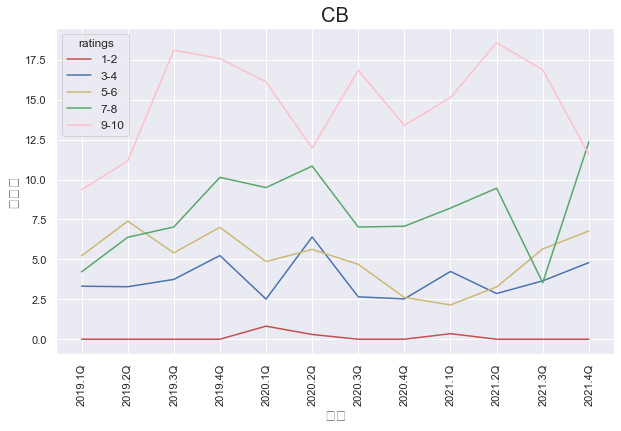

In [45]:
draw_data("CB")

In [17]:
def draw_data(param):
    sns.set()
    
    if param == 'CB':        
        df_cb = make_dlay_rate(df_mg, 'CB')
#         final_df_cb = make_df_new(df_cb)
        
        plt.plot(df_cb.index, df_cb['1-2'], color='r')
        plt.plot(df_cb.index, df_cb['3-4'], color='b')
        plt.plot(df_cb.index, df_cb['5-6'], color='y')
        plt.plot(df_cb.index, df_cb['7-8'], color='g')
        plt.plot(df_cb.index, df_cb['9-10'], color='pink')
        
        plt.title('CB',fontsize=20)
        plt.ylabel('연체율', fontsize=15)
        plt.xlabel('분기', fontsize=15)
        plt.legend(df_cb.columns,fontsize=12, loc='best', title='ratings')
        
        plt.xticks(rotation = 90 )
        
    elif param == 'SP':
        df_sp = make_dlay_rate(df_mg, 'SP')
#         final_df_sp = make_df_new(df_sp)
        
        plt.plot(df_sp.index, df_sp['1-2'], color='r')
        plt.plot(df_sp.index, df_sp['3-4'], color='b')
        plt.plot(df_sp.index, df_sp['5-6'], color='y')
        plt.plot(df_sp.index, df_sp['7-8'], color='g')
        plt.plot(df_sp.index, df_sp['9-10'], color='pink')
        
        plt.title('SP',fontsize=20)
        plt.ylabel('연체율', fontsize=15)
        plt.xlabel('분기', fontsize=15)
        plt.legend(df_sp.columns,fontsize=12, loc='best', title='ratings')
        
        plt.xticks(rotation = 90 )
        
    elif param == 'R': 
        df_r = make_dlay_rate(df_mg, 'R')
#         final_df_r = make_df_new(df_r)
        
        plt.plot(df_r.index, df_r['1-2'], color='r')
        plt.plot(df_r.index, df_r['3-4'], color='b')
        plt.plot(df_r.index, df_r['5-6'], color='y')
        plt.plot(df_r.index, df_r['7-8'], color='g')
        plt.plot(df_r.index, df_r['9-10'], color='pink')
        
        plt.title('R',fontsize=20)
        plt.ylabel('연체율', fontsize=15)
        plt.xlabel('분기', fontsize=15)
        plt.legend(df_r.columns,fontsize=12, loc='best', title='ratings')
        
        plt.xticks(rotation = 90 )
        

    elif param == 'PI':     
        df_pi = make_dlay_rate(df_mg, 'PI')
#         final_df_pi = make_df_new(df_pi)
        
        plt.plot(df_pi.index, df_pi['1-2'], color='r')
        plt.plot(df_pi.index, df_pi['3-4'], color='b')
        plt.plot(df_pi.index, df_pi['5-6'], color='y')
        plt.plot(df_pi.index, df_pi['7-8'], color='g')
        plt.plot(df_pi.index, df_pi['9-10'], color='pink')
        
        plt.title('PI',fontsize=20)
        plt.ylabel('연체율', fontsize=15)
        plt.xlabel('분기', fontsize=15)
        plt.legend(df_pi.columns,fontsize=12, loc='best', title='ratings')
        
        plt.xticks(rotation = 90 )

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from c

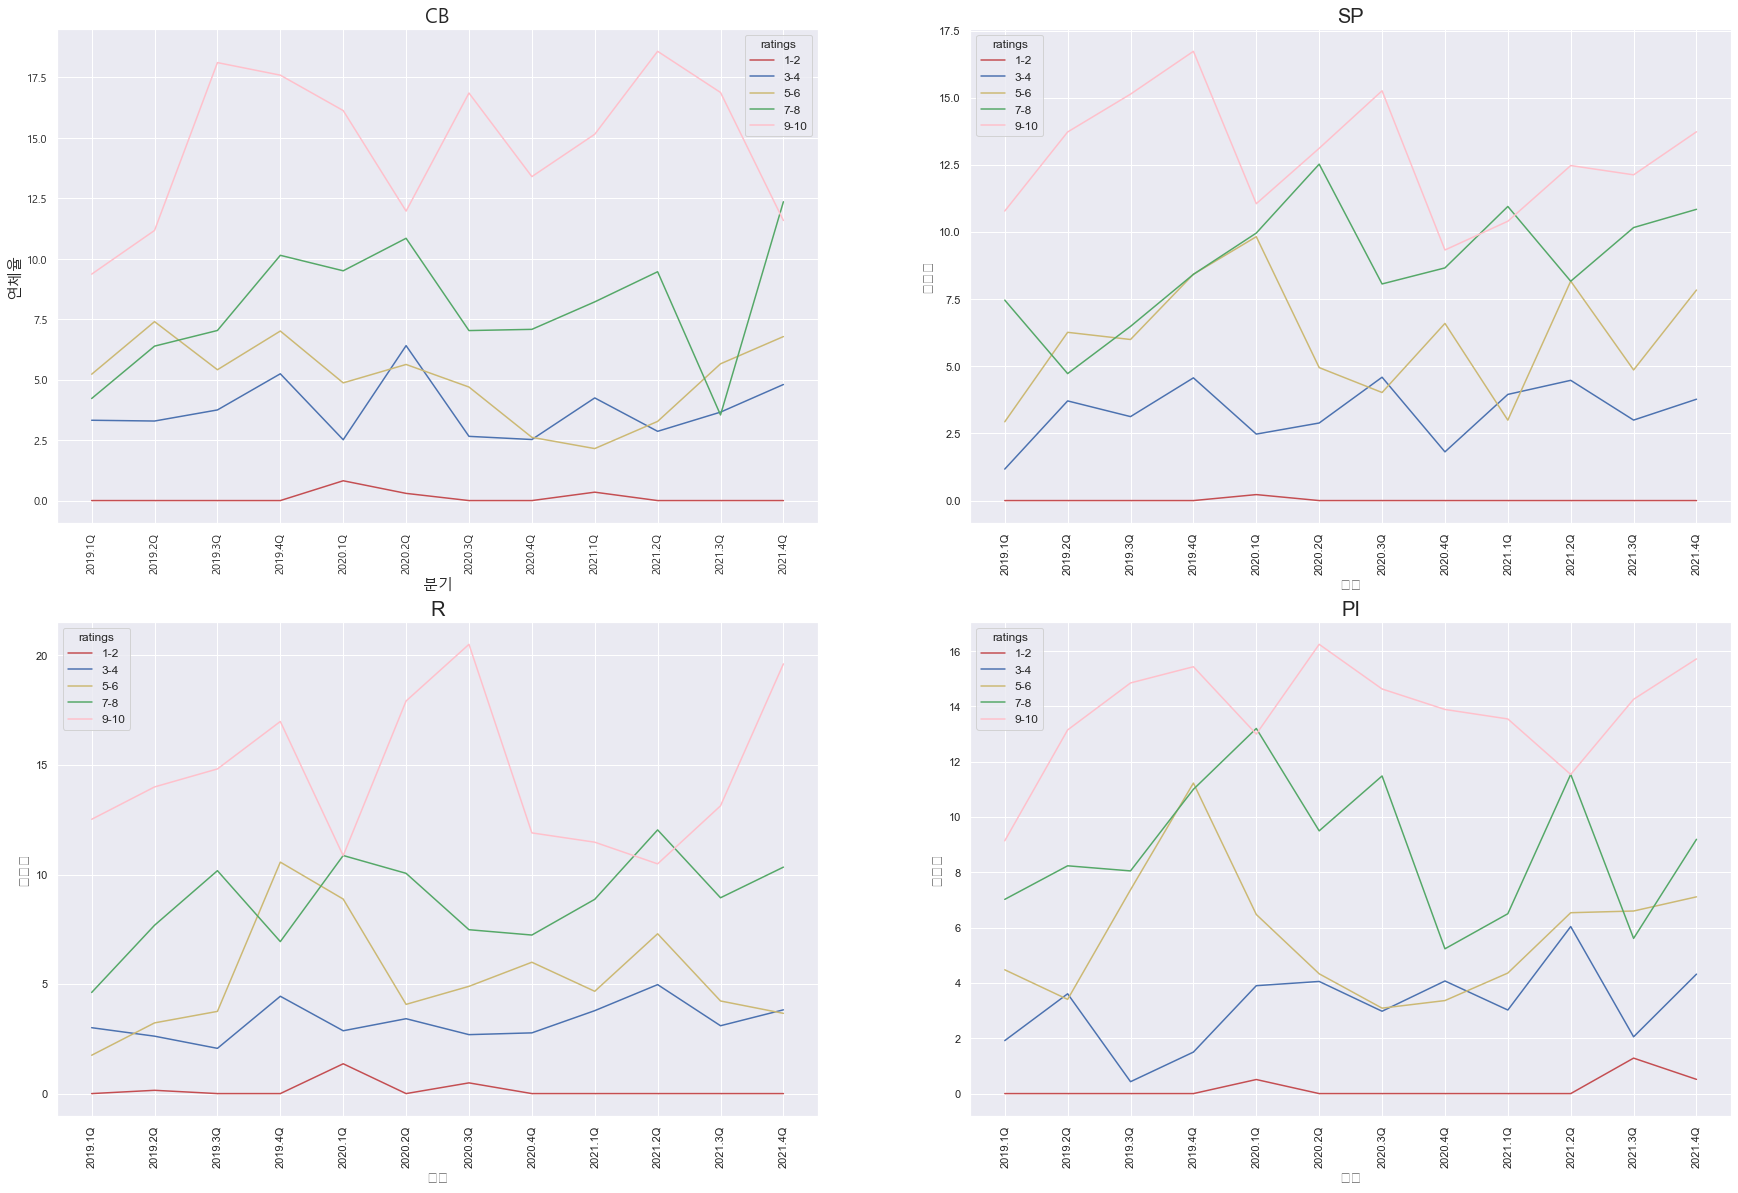

In [18]:
plt.figure(figsize=(30,20))

plt.subplot(221) 
draw_data('CB')  #위에서 함수화 했기때문에 함수이름만 호출하면 됨

plt.subplot(222) 
draw_data('SP')

plt.subplot(223)
draw_data("R")

plt.subplot(224)
draw_data("PI")

#draw_data('PBOX')

plt.show()

#### 추가분석 : 등급별 잔액비율

In [19]:
def make_bal_rate(df_mg , cb_dvcd ):  #cb_dvcd = CB, SP, R, PI 넣기
    
    re = []
    
    for idx in  df_mg.index:

        if df_mg[cb_dvcd][idx] <=2:
            re.append('1-2')
        elif df_mg[cb_dvcd][idx] <=4:
            re.append('3-4')
        elif df_mg[cb_dvcd][idx] <=6:
            re.append('5-6')
        elif df_mg[cb_dvcd][idx] <=8:
            re.append('7-8')
        else:
            re.append('9-10')
    
    df_mg['re_rating'] = re
    
    df_sum = df_mg.groupby('exec_yq').agg({'cur_bal': 'sum'})    
    df_cur = df_mg.groupby(['exec_yq', 're_rating']).agg({'cur_bal': 'sum'})
    
    df = pd.merge(df_cur, df_sum, on = 'exec_yq')
    df.columns = ['cur_bal','cur_bal_sum']
    
    df['cb_bal_rate'] = df['cur_bal'] / df['cur_bal_sum'] * 100
#     df = df['cb_bal_rate'].unstack()
    
    return df

In [20]:
df_cb_bal = make_bal_rate(df_mg, 'R')
df_cb_bal.head(5)

,cur_bal,cur_bal_sum,cb_bal_rate
exec_yq,,,
2019.1Q,2520237261,13001349866,19.384428
2019.1Q,2634966938,13001349866,20.266872
2019.1Q,2667344872,13001349866,20.515907
2019.1Q,2447046024,13001349866,18.821477
2019.1Q,2731754771,13001349866,21.011317


In [21]:
df_sum = df_mg.groupby('exec_yq').agg({'cur_bal': 'sum'})
df_sum

,cur_bal
exec_yq,
2019.1Q,13001349866
2019.2Q,13083839429
2019.3Q,12190619319
2019.4Q,13477619150
2020.1Q,12961935737
2020.2Q,13148388810
2020.3Q,12671319733
2020.4Q,12916508210
2021.1Q,13625050827


In [32]:
df_cur = df_mg.groupby(['exec_yq', 're_rating']).agg({'cur_bal': 'sum'})
df_cur = df_cur.reset_index()

In [33]:
df_cur.head()

,exec_yq,re_rating,cur_bal
0,2019.1Q,1-2,2520237261
1,2019.1Q,3-4,2634966938
2,2019.1Q,5-6,2667344872
3,2019.1Q,7-8,2447046024
4,2019.1Q,9-10,2731754771


In [34]:
df_mg2 = pd.merge(df_cur, df_sum, on = 'exec_yq')
# df_mg2 = df_cur.join(df_sum, how='left')
df_mg2.head()

,exec_yq,re_rating,cur_bal_x,cur_bal_y
0,2019.1Q,1-2,2520237261,13001349866
1,2019.1Q,3-4,2634966938,13001349866
2,2019.1Q,5-6,2667344872,13001349866
3,2019.1Q,7-8,2447046024,13001349866
4,2019.1Q,9-10,2731754771,13001349866


In [36]:
#df_mg2.columns = ['cur_bal','cur_bal_sum']
#df_mg2

In [38]:
df_cb = make_bal_rate(df_mg, 'R')
df_cb.head(5)

,cur_bal,cur_bal_sum,cb_bal_rate
exec_yq,,,
2019.1Q,2520237261,13001349866,19.384428
2019.1Q,2634966938,13001349866,20.266872
2019.1Q,2667344872,13001349866,20.515907
2019.1Q,2447046024,13001349866,18.821477
2019.1Q,2731754771,13001349866,21.011317


In [30]:
df_cb

,cur_bal,cur_bal_sum,cb_bal_rate
exec_yq,,,
2019.1Q,2520237261,13001349866,19.384428
2019.1Q,2634966938,13001349866,20.266872
2019.1Q,2667344872,13001349866,20.515907
2019.1Q,2447046024,13001349866,18.821477
2019.1Q,2731754771,13001349866,21.011317
2019.2Q,2609415359,13083839429,19.943805
2019.2Q,2602491477,13083839429,19.890885
2019.2Q,2460095116,13083839429,18.802547
2019.2Q,2737069741,13083839429,20.919469


In [29]:
2520237261/13001349866*100

19.384427670781363

In [58]:
def make_df_new(df):
    df['1-2'] = df[1] + df[2]
    df['3-4'] = df[3] + df[4]
    df['5-6'] = df[5] + df[6]
    df['7-8'] = df[7] + df[8]
    df['9-10'] = df[9] + df[10]
    needs_cols = ['1-2','3-4','5-6','7-8','9-10']
    final_df = df.loc[:, needs_cols]
    
    return final_df

In [59]:
final_df_cb = make_df_new(df_cb)

In [60]:
final_df_cb

R,1-2,3-4,5-6,7-8,9-10
exec_yq,,,,,
2019.1Q,0.000000,6.120226,3.594307,9.237991,25.481773
2019.2Q,0.289060,5.714341,6.344850,15.814921,28.213662
2019.3Q,0.000000,4.139415,6.671564,20.021012,29.711386
2019.4Q,0.000000,8.520980,21.314948,13.887969,32.458473
2020.1Q,2.240797,5.790092,17.901508,20.571530,21.793641
2020.2Q,0.000000,7.016965,8.065621,20.081632,36.543229
2020.3Q,0.932714,5.640173,9.185328,14.787148,38.803282
2020.4Q,0.000000,5.495367,12.318543,14.378005,23.689018
2021.1Q,0.000000,8.166882,9.345942,17.693181,21.985906


In [175]:
# sns.set()
# plt.figure(figsize=(20,10))

# plt.plot(final_df_cb.index, final_df_cb['1-2'], color='r')
# plt.plot(final_df_cb.index, final_df_cb['3-4'], color='b')
# plt.plot(final_df_cb.index, final_df_cb['5-6'], color='y')
# plt.plot(final_df_cb.index, final_df_cb['7-8'], color='g')
# plt.plot(final_df_cb.index, final_df_cb['9-10'], color='pink')

# plt.title('CB',fontsize=20)
# plt.ylabel('cb_dlay_rate', fontsize=15)
# plt.xlabel('exec_yq', fontsize=15)
# plt.legend(final_df_cb.columns,fontsize=12, loc='best')
# plt.show()

In [61]:
def draw_data(param):
    sns.set()
    #plt.figure(figsize=(10,10))
    
    
    if param == 'CB':        
        df_cb = make_dlay_rate(df_mg, 'CB')
        final_df_cb = make_df_new(df_cb)
        
        plt.plot(final_df_cb.index, final_df_cb['1-2'], color='r')
        plt.plot(final_df_cb.index, final_df_cb['3-4'], color='b')
        plt.plot(final_df_cb.index, final_df_cb['5-6'], color='y')
        plt.plot(final_df_cb.index, final_df_cb['7-8'], color='g')
        plt.plot(final_df_cb.index, final_df_cb['9-10'], color='pink')
        
        plt.title('CB',fontsize=20)
        plt.ylabel('cb_dlay_rate', fontsize=15)
        plt.xlabel('exec_yq', fontsize=15)
        plt.legend(final_df_cb.columns,fontsize=12, loc='best')
        
    elif param == 'SP':
        df_sp = make_dlay_rate(df_mg, 'SP')
        final_df_sp = make_df_new(df_sp)
        
        plt.plot(final_df_sp.index, final_df_sp['1-2'], color='r')
        plt.plot(final_df_sp.index, final_df_sp['3-4'], color='b')
        plt.plot(final_df_sp.index, final_df_sp['5-6'], color='y')
        plt.plot(final_df_sp.index, final_df_sp['7-8'], color='g')
        plt.plot(final_df_sp.index, final_df_sp['9-10'], color='pink')
        
        plt.title('SP',fontsize=20)
        plt.ylabel('sp_dlay_rate', fontsize=15)
        plt.xlabel('exec_yq', fontsize=15)
        plt.legend(final_df_sp.columns,fontsize=12, loc='best')     
        
    elif param == 'R': 
        df_r = make_dlay_rate(df_mg, 'R')
        final_df_r = make_df_new(df_r)
        
        plt.plot(final_df_r.index, final_df_r['1-2'], color='r')
        plt.plot(final_df_r.index, final_df_r['3-4'], color='b')
        plt.plot(final_df_r.index, final_df_r['5-6'], color='y')
        plt.plot(final_df_r.index, final_df_r['7-8'], color='g')
        plt.plot(final_df_r.index, final_df_r['9-10'], color='pink')
        
        plt.title('R',fontsize=20)
        plt.ylabel('r_dlay_rate', fontsize=15)
        plt.xlabel('exec_yq', fontsize=15)
        plt.legend(final_df_r.columns,fontsize=12, loc='best')    
        

    elif param == 'PI':     
        df_pi = make_dlay_rate(df_mg, 'PI')
        final_df_pi = make_df_new(df_pi)
        
        plt.plot(final_df_pi.index, final_df_pi['1-2'], color='r')
        plt.plot(final_df_pi.index, final_df_pi['3-4'], color='b')
        plt.plot(final_df_pi.index, final_df_pi['5-6'], color='y')
        plt.plot(final_df_pi.index, final_df_pi['7-8'], color='g')
        plt.plot(final_df_pi.index, final_df_pi['9-10'], color='pink')
        
        plt.title('PI',fontsize=20)
        plt.ylabel('pi_dlay_rate', fontsize=15)
        plt.xlabel('exec_yq', fontsize=15)
        plt.legend(final_df_pi.columns,fontsize=12, loc='best')         

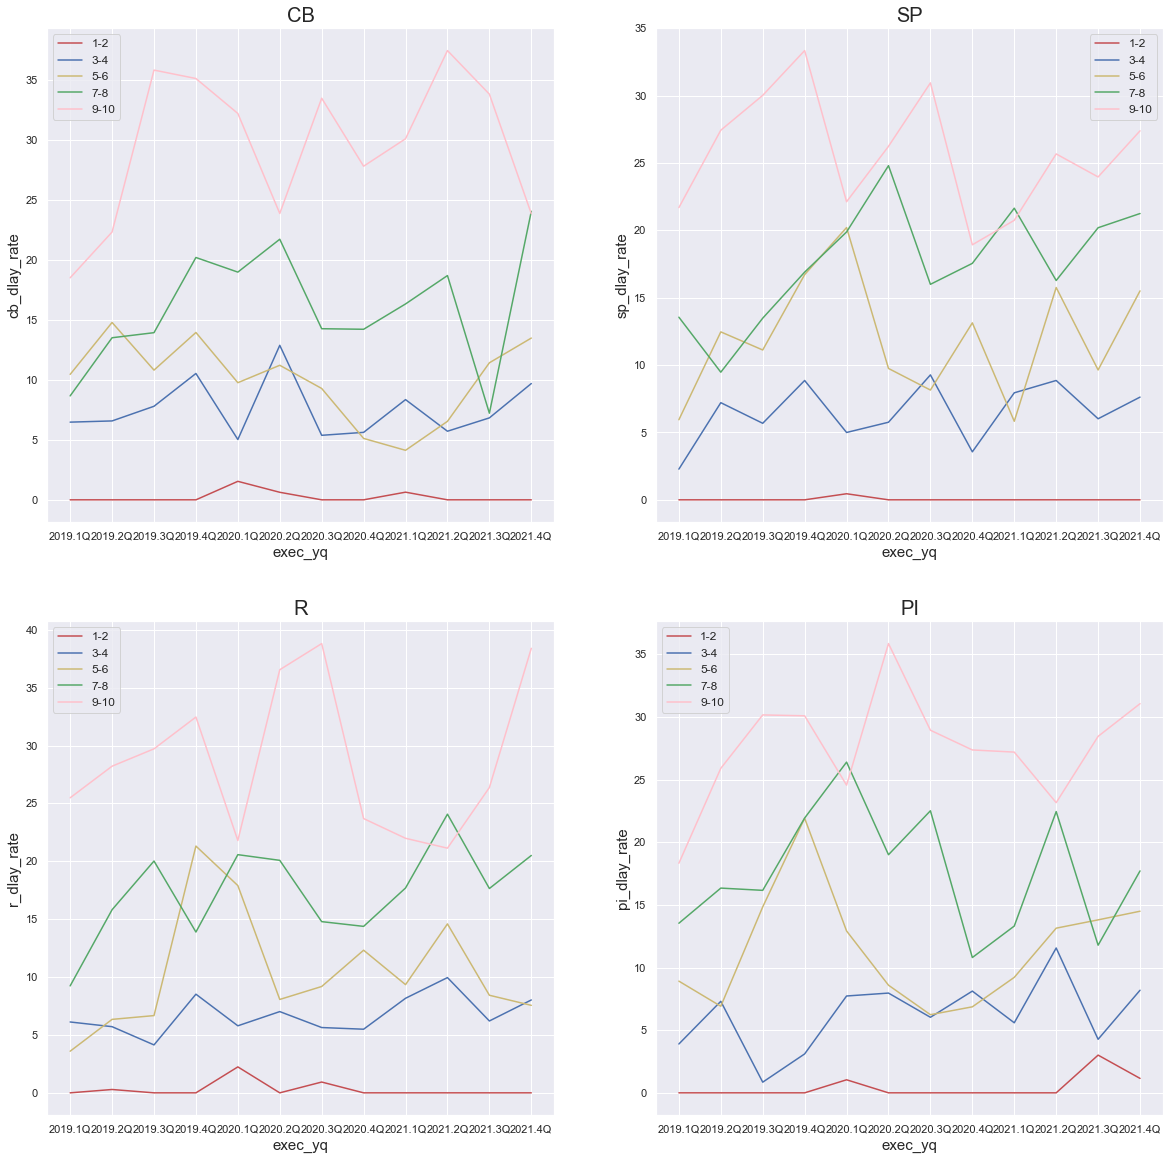

In [212]:
plt.figure(figsize=(20,20))

plt.subplot(221) 
draw_data('CB')  #위에서 함수화 했기때문에 함수이름만 호출하면 됨

plt.subplot(222) 
draw_data('SP')

plt.subplot(223)
draw_data("R")

plt.subplot(224)
draw_data("PI")

#draw_data('PBOX')

plt.show()

In [ ]:
# describe() 해보기
# 등급별 잔액대비 연체비중
# 연체비중 (나이대별, 성별 : 막대 옆으로, 파이그래프)

In [39]:
#등급별 1인 사람수별로 카운트 한 것, 
#평균 등급
#성별로도 봐보기
#나이로도 봐보기